# Caracterización de la señal sísmica asociada a Caída de rocas en el Oeste de Dru (Mont Blanc)-2005.

## Universidad Nacional Autónoma de México
### Centro de Geociencias
### Sismologia Ambiental 2018-1
### Adolfo David Robayo Robayo

###  INTRODUCCIÓN

### La caída de rocas es un proceso de remoción de masa que ocurre comúnmente en zonas montañosas. Esto representa un peligro para la población; teniendo en cuenta que cada vez es mayor la cantidad de asentamientos en estos lugares se pueden generar pérdidas humanas y de infraestructura; adicionalmente puede impactar de forma indirecta, pues los depósitos pueden represar cuerpos de agua que posteriormente desencadenan inundaciones, esto se da principalmente en los valles (Dammeier et al., 2011, Ravanel & Deline, 2008).

### A pesar de la recurrencia y del peligro que representa la caída de rocas, estos siguen siendo fenómenos poco conocidos, en parte por su ubicación. En este sentido, el análisis de datos sísmicos son una herramienta útil para la caracterización remota de caída de roca (Dammeier et al., 2011, Larose et al., 2015), no solo por la solución ante la dificultad que implica llegar a algunos sitios, sino también por la rapidez en la obtención de la información, comparada con el tiempo de adquisición de datos en descripciones de campo (Dammeier et al., 2011).

### Con base en la importancia de análisis de datos sísmicos para el estudio de movimientos de masa, en este trabajo se presenta un ejemplo de la caracterización de la señal sísmica asociada a la caída de rocas de la cara Oeste de la montaña Dru en Montblanc (Francia), usando transformaciones de Fourier; específicamente para el colapso del 30 de junio 2005 (45.932650° N, 6.952383° W)(Imagen1). Su origen puede ser asociado a la combinación de altas temperaturas y alta precipitación, lo cual favoreció la degradación del permafrost, generando un volumen de roca mayor a 250.000 m3 y una cicatriz de 600 m de altura (Ravanel & Deline 2008)(Imagen 2).

### Para esto se tomaron datos de dos estaciones (EMW y FUSIO) (Tabla 3- Imagen 3)de la Red Sismológica Suiza (SED), las señales sísmicas fueron tratadas con el software Obspy, a través de transformaciones de Fourier y de filtrados de frecuencias bajas, esto con el objetivo de hallar el espectro de frecuencias características. Teniendo en cuenta que las estaciones EMW y FUSIO están localizadas a diferentes distancias del lugar de estudio 15 Km y 114 Km respectivamente(Imagen 4), se pudo identificar que la cercanía al evento, tienen influencia en las respuestas espectrales, ya que la frecuencia de la estación más cercana es más energética (1-8 Hz) comparada con la más distante (0,5-1 Hz).

 





## MARCO TEÓRICO

### El término caída de roca en el presente trabajo se usa de acuerdo a la actualización de la clasificación de Verne (Hungr et al., 2014), lo cual hace referencia a la caída, desprendimiento o rodada de fragmentos de roca; donde hay poca interacción entre los fragmentos móviles, estos interactúan principalmente con el sustrato y pueden quebrarse durante impactos. A veces puede estar asociado o comportase en un punto transitorio como avalanchas de rocas, los cuales son un poco más fluidos, establecer el límite entre ambos es un tema de debate pero se asocia más peligro y mayores distancias con avalanchas de rocas (Hungr et al., 2014). 

### La caída de rocas en altas montañas puede ser desencadenado por tres factores principales que pueden combinarse o actuar asilados, y corresponden a la actividad sísmica, la descompresión y degradación del permafrost (Evans y Gardner, 1989 en Ravanel & Deline 2008).

### La caída de rocas en las señales sísmicas puede ser distinguida de otros colapsos de roca por su alta frecuencia inicial.  Vilajosana et al. [2008] en Dammeier et al., 2011 encontró que las bandas energéticas del espectro pueden ser similares a la señal de una explosión, otros trabajos identificaron ráfagas de alta frecuencia cuando el bloque golpea la pendiente (Moore et al., 2007 en Dammeier et al., 2011).

 

### El método usado en este trabajo para la caracterización de las señales es transformación de Fourier, lo cual es una medida de la similaridad de la señal con una base familiar formada por senos y coseno. Esto puede ser expresado como el producto interno de una señal s(t) con un modelo 𝜓(t) (Tary et al., 2014). Cuando este modelo está compuesto de senos y cosenos, por la ecuación de Euler sabemos que el valor complejo del coseno es 𝜓 (t) = ei2𝜋ft, así el producto interno se reduce a la transformación de Fourier (Tary et al., 2014)

### Donde t es el tiempo, f es la frecuencia, i es la raiz  cuadrada de -1.(Imágen 5)

 ### La transformación de Fourier es aplicada a una señal en su totalidad, por lo tanto asume que es estacionaria. Cabe destacar que la transformación de Fourier de tiempo corto es la más popular para trabajar con señales de tiempo no estacionarias (Tary et al., 2014). 

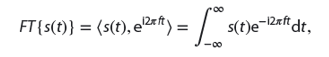

In [83]:
#Imagen 5.
image = Image.open("FOURIER.png")#localizacion evento , Morfologia de ambiente glacial (figura 2)
image

## Metodología

### Se llevó a cabo el análisis de la señal de la caída de roca del Flanco Oeste de Dru - Mont Blanc por medio del uso de librerías de Python, como herramienta para procesar los datos obtenidos en las estaciones de EMV y FUSIO; que nos permitió llevar la señal del dominio del tiempo al dominio de la frecuencia por medio de las Transformadas de Fourier; no sin antes hacer un limpiado de la señal como lo es la corrección del DC y suavizado de la señal mediante los promedios móviles, y por consiguiente hallar los espectros de frecuencia asociados a la señal, el sensor que registró el evento en la estación EMV y FUSIO corresponde a  sismómetros banda ancha (ver tabla 1), conociendo su ancho de banda determinamos el vector de frecuencias para cada señal y con  la frecuencia de Nyquist se hace el muestreo reduciéndose a la mitad pasando de 120 Hz a 60 Hz, luego se revisan los espectros de frecuencias características para cada señal y se hace un filtrado pasa banda hacia bajas frecuencias por la tendencia que se observa;  por ultimo se elaboran los espectrogramas que nos permiten observar y analizar la relación tiempo frecuencia para caracterizar frecuencialmente el evento.

## Librerías importadas de Obspy

In [65]:
from obspy import read
from obspy import UTCDateTime, Stream
from scipy import signal
import numpy as np
from numpy.fft import fft
from numpy import ndarray
import matplotlib.pyplot as plt
%matplotlib inline
import obspy.signal
from PIL import Image
from __future__ import division
data = st2[0].data
npts = st2[0].stats.npts
delta = st2[0].stats.delta
from obspy.signal.tf_misfit import plot_tfr
#%pylab inline

## Imagen 1. localización del evento, escala  con exageración vertical 2:1

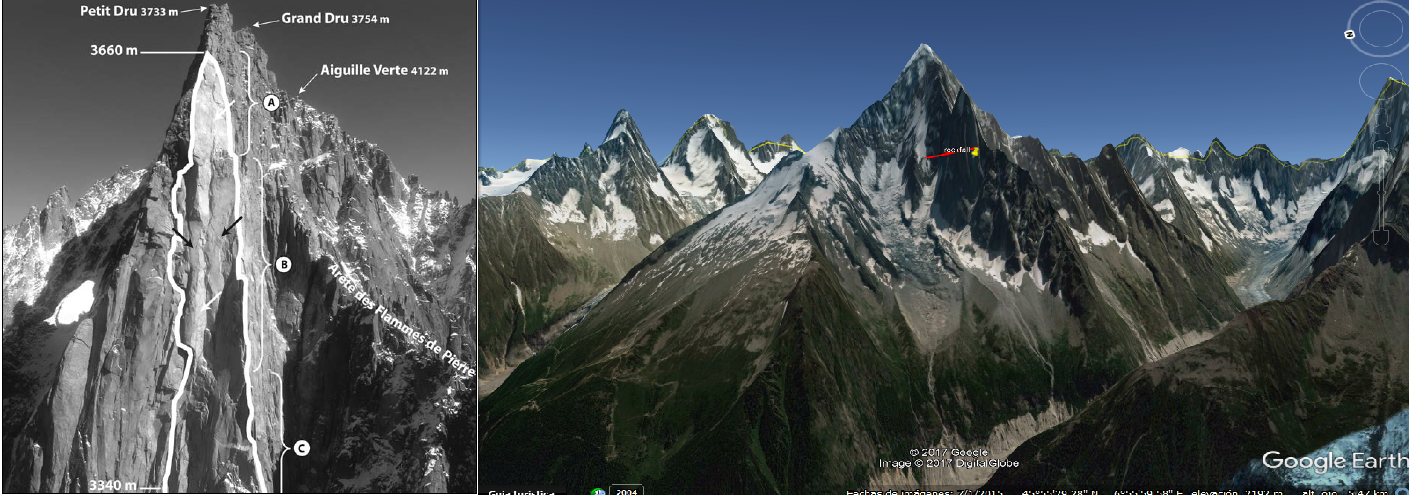

In [69]:
image = Image.open("rockfall(1).png")#localizacion evento , Morfologia de ambiente glacial (figura 2)
image

 ## Imagen 2. Evento de 2005 , señalado en color amarillo

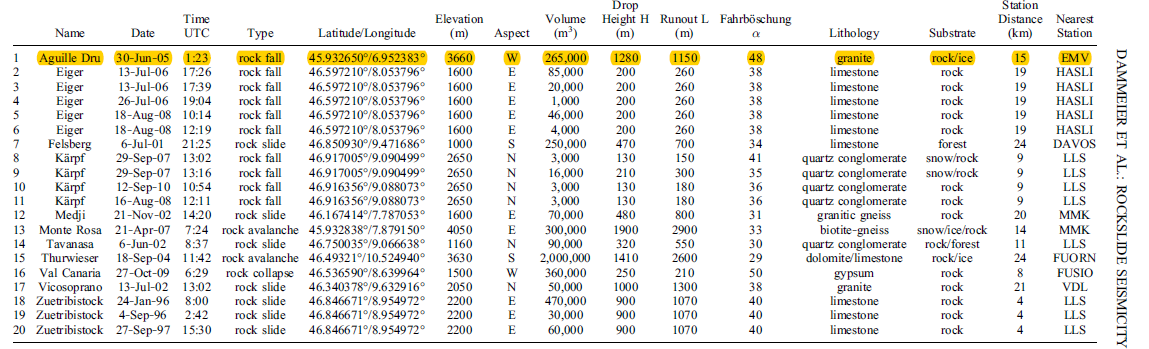

In [71]:
image = Image.open("eventos.png")
image

## Imagen 3. Red de  estaciones sismologicas de la Red Sismológica de Suiza

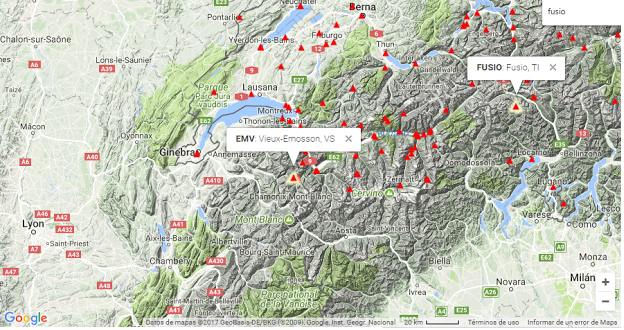

In [73]:
image = Image.open("Red_estaciones_Suiza.png")
image

## Imagen 4. Puntos de estaciones EMV y FUSIO y punto del Evento

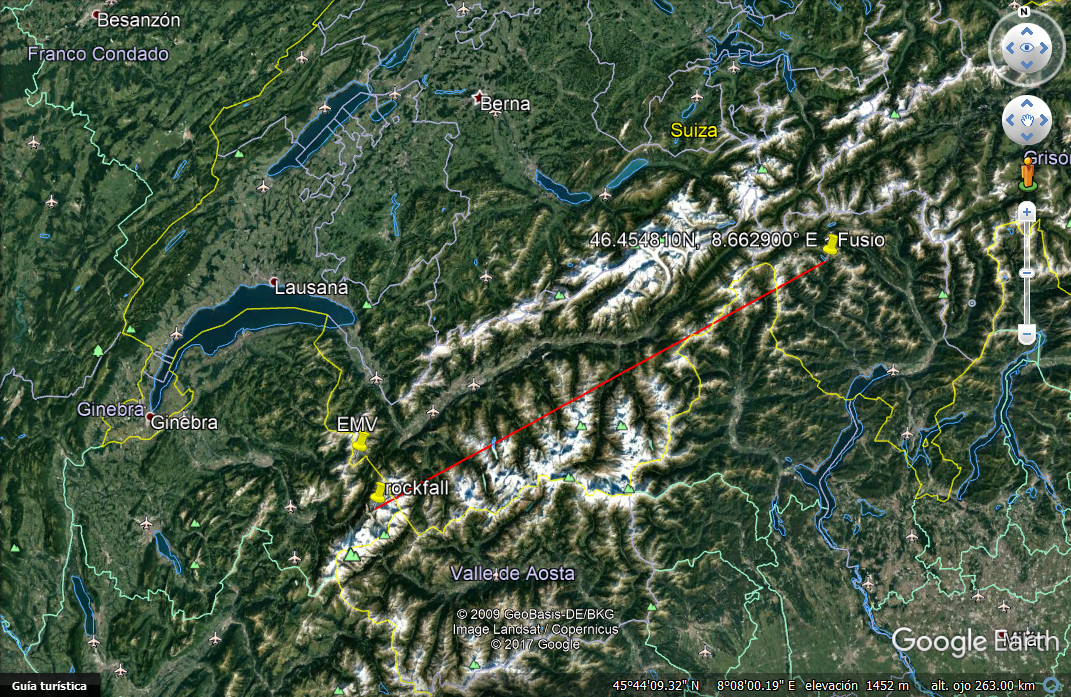

In [82]:
image = Image.open("diastancia_Fusio.png") #estaciones trabajadas
image

## Tabla 1. Características de los sensores  y sus  respectivas estaciones

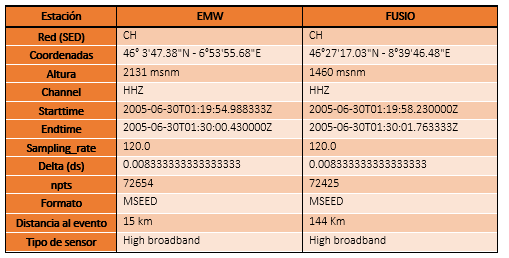

In [74]:
image = Image.open("info_estaciones.png")
image

## Sismogramas de las estaciones EMV y FUSIO

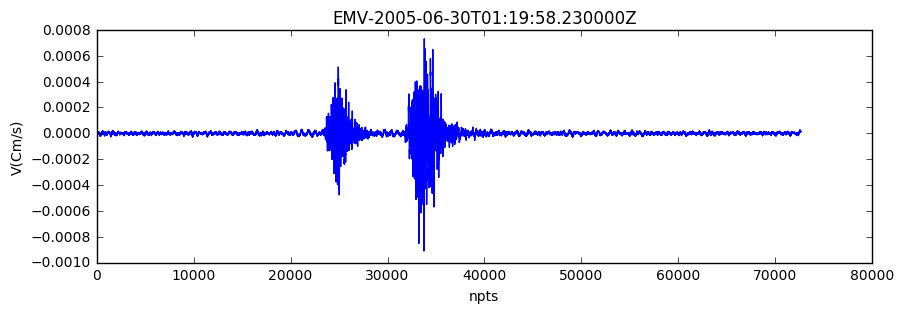

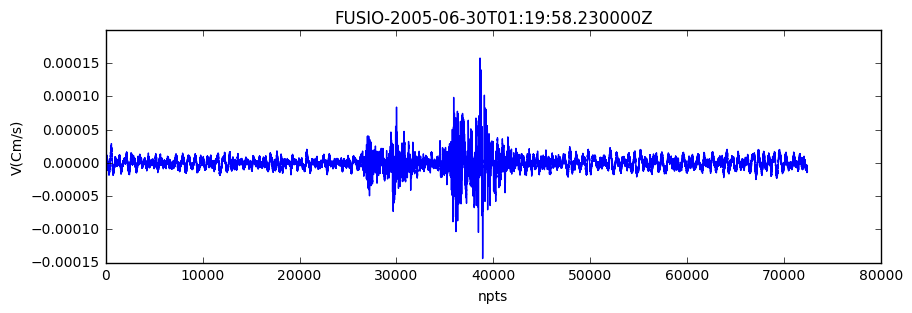

In [29]:
st = read("Package_AguilleDru_2377562_SED.mseed")
st2 = st.select(id="CH.EMV..HHZ")
st5 = st.select(id="CH.FUSIO..HHZ")
# Cuentas to m/s
Ctoms = 6.276150e8; 
X = st2[0].data*(1/Ctoms)*100
plt.figure(figsize=(10,3))
plt.plot(X)
plt.title('EMV-2005-06-30T01:19:58.230000Z')
plt.xlabel('npts')
plt.ylabel('V(Cm/s)')
plt.show()
X1 = st5[0].data*(1/Ctoms)*100
plt.figure(figsize=(10,3))
plt.plot(X1)
plt.title('FUSIO-2005-06-30T01:19:58.230000Z')
plt.xlabel('npts')
plt.ylabel('V(Cm/s)')
plt.show()

## Envolvente de las señales de EMV y FUSIO respectivamente

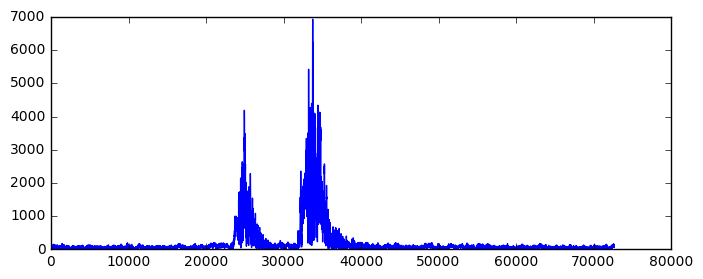

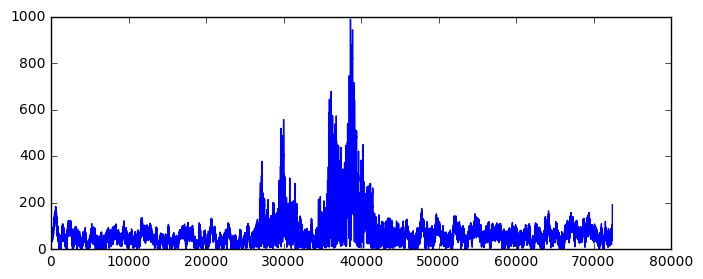

In [48]:
data_envelope = obspy.signal.filter.envelope(st2[0].data)
plt.figure(figsize=(8,3))
plt.plot(data_envelope)#data_envelope = obspy.signal.filter.envelope(st2[0].data)
data_envelope1 = obspy.signal.filter.envelope(st5[0].data)
plt.figure(figsize=(8,3))
plt.plot(data_envelope1)#data_envelope = obspy.signal.filter.envelope(st2[0].data)
plt.show()

#### Figuras de la envolvente de EMV y FUSIO

## Filtrado de la señal

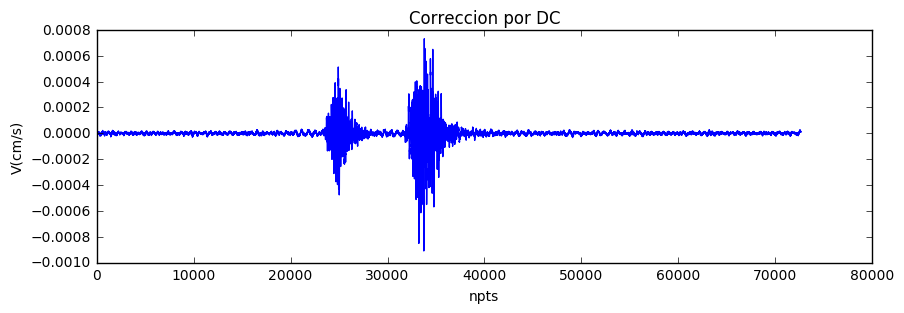

In [79]:
x = (st2[0].data)*(1/Ctoms)*100
x2 = x-np.mean(x)
x2 = signal.detrend(x2)
plt.figure(figsize=(10,3))
plt.plot(x2)
plt.title('Correccion por DC')
plt.xlabel('npts')
plt.ylabel('V(cm/s)')
plt.show()

## Transformada de Fourier. Paso del dominio del tiempo al dominio de la frecuencia

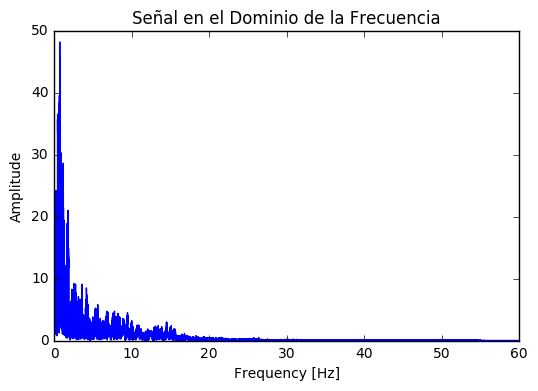

In [84]:
Fsig = np.fft.rfft(st2[0], n=len(st2[0]))
xf = np.linspace(0, 1.0/(2.0*delta), (npts/2)+1)
plt.title('Señal en el Dominio de la Frecuencia')
plt.plot(xf, 2.0/npts * np.abs(Fsig))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') 
plt.show()

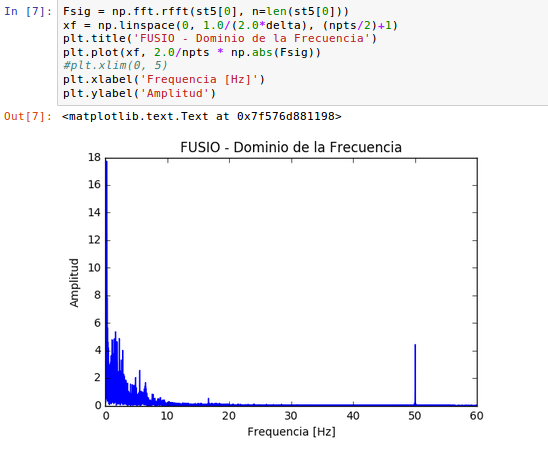

In [42]:
image = Image.open("FUSIO_espectro_frecuencias.png")
image

### En estas imagenes se observa la señal en el dominio de la frecuencia, presentando la primera mayor densidad de frecuencia menores a < 20 Hz y la segunda a < 10  Hz es primer espectro de frecuencia corresponde a  la señal de la estación EMV y la segunda a la señal de la estación Fusio, esta ultima presenta un pico espectral a 50 Hz.

## Filtrado de pasa banda para las frecuencias espectrales

In [34]:
st2_filt = st2[0].copy()
st2_filt.filter("bandpass", freqmin=0.0, freqmax=8, corners=2, zerophase=True)

CH.EMV..HHZ | 2005-06-30T01:19:54.988333Z - 2005-06-30T01:30:00.430000Z | 120.0 Hz, 72654 samples

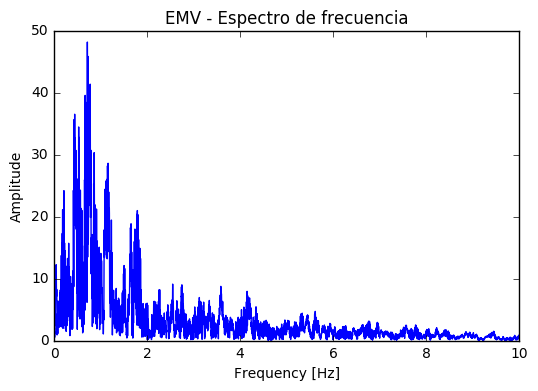

In [47]:
F_filt = np.fft.rfft(st2_filt, n=len(st2_filt))
plt.title('EMV - Espectro de frecuencia')
plt.plot(xf, 2.0/npts * np.abs(F_filt)) 
plt.xlim(0, 10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')  

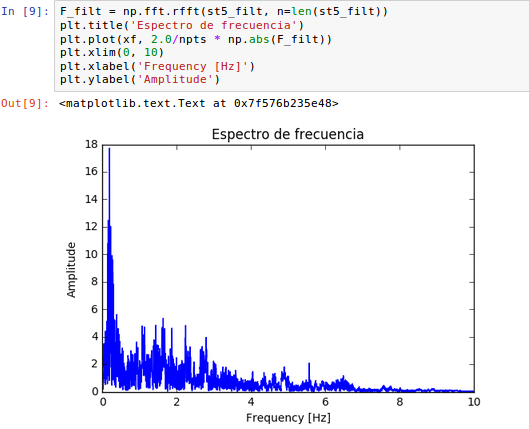

In [46]:
image = Image.open("FUSIO_espectro de frecuencias.png")#localizacion evento , Morfologia de ambiente glacial (figura 2)
image

### Se realiza el filtrado pasa banda a bajas frecuencias entre 0 Hz y 8Hz, donde se observa que para la señal de  EMV tiene una mayor desidad espectral entre 0Hz a 2Hz, mientras que para Fusio la tendencia es < 0.5 Hz.

## Espectrogramas

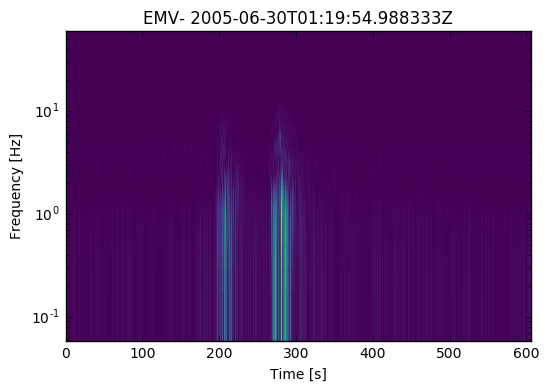

In [37]:
st2_filt.spectrogram(log=True, title='EMV- ' + str(st2[0].stats.starttime))

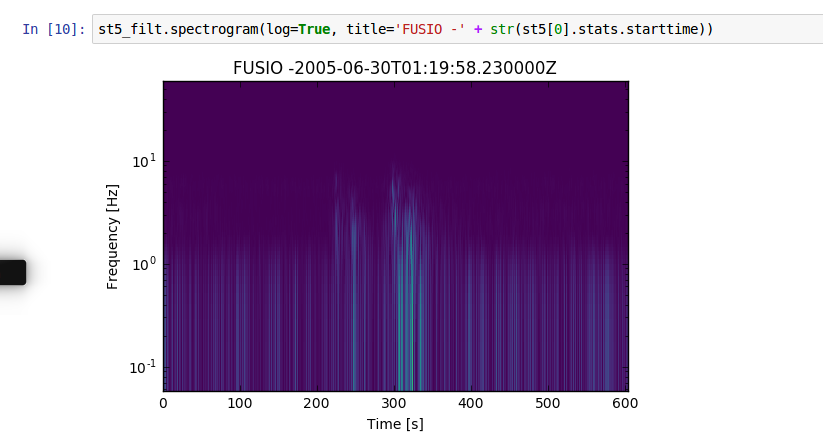

In [44]:
image = Image.open("FUSIO_espectrograma.png")#localizacion evento , Morfologia de ambiente glacial (figura 2)
image

### La densidad espectral en el tiempo que muestran los espectogramas  de EMV y FUSIO refleja la frecuencia caracteriztica del evento en el tiempo siendo mas resolucion en EMV que en FUSIO.

## Espectrogramas de EMV  y FUSIO con el tiempo y espectro de Frecuencia asociado.

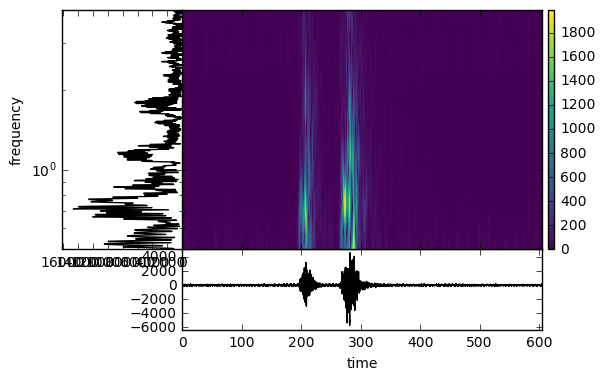

In [38]:
plot_tfr(st2[0].data, dt=delta, fmin=0.5, fmax=4)


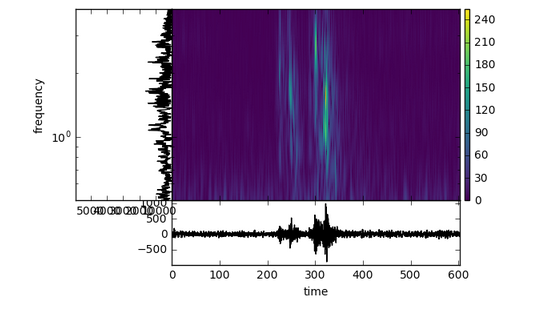

In [80]:
image = Image.open("FUSIO_espectrograma_integrado.png")#localizacion evento , Morfologia de ambiente glacial (figura 2)
image

## Resultados

### La señal sismica asociada al este evento ocurrido en 2005 tuvo un amplio registro en la Red Sismológica de Suiza, siendo esto objeto de estudio para la caracterización de señales no estacionarias, además permitío la caracterización de comportamiento frecuencial en función de la distancia, refiriendo a que en dos estaciones con difrentes proximidades se pudo notar claramente, que el valor de la frecuencia de la señal va siendo menor en cuanto mayor sea la distacia,  lo cual se relaciona con el efecto de atenuacion de la propagación de la ondas  que sufren a atravezar  la corteza, como un filtro de pasa banda de altas a bajas frecuencias, lo que ha sido observado por decadas en telesismos. 

### El monitoreo y estudio  de señales sismicas  derivadas de procesos superficiales como la caida de rocas que se consideren una geoamenaza, se presentan como una herramienta clave para alertar a alguna población que tenga algún grado de vulnerablidad, caracterizar señales asociadas a diferentes procesos superficiales ayudan a establecer una firma propia.

## Conclusiones

## - El procesamiento de señales sísmicas mediante la conversión del dominio del tiempo al dominio de la frecuencia ayuda a entender y caracterizar señales no estacionarias que se asocian a eventos de procesos superficiales tales como caídas de grandes masas de roca.

## - La señal sismica asociada a una caida de rocas o cualquier proceso superficial puede ayudar a entender su dinámica  y por ende establecer una firma en los contenidos frecuenciales observandose claramente su comportamiento en el tiempo y distancia.
 
 ## - El análisis de espectrogramas de caída de rocas del evento 2005 de la Cara de Dru, Montblanc reveló que la mayoría de la energía sísmica cae por debajo de  4  Hz, el promedio del espectro de Fourier computarizado sobre la duración total de los eventos, muestra una energía menor a   Hz, sin un orden consistente identificable en los picos espectrales. En la investigación de sismogramas sin filtrados se encontró que la mayoría de la energía está sobre 0,5 Hz. El límite superior de frecuencia está generalmente es de 10 Hz.
 
## - Eventos como caida de rocas pueden ser muy energicos que se pueden ver realcionados con altos contenidos frecuenciales los cuales rapidamente se atenuan en el tiempo.

## REFERENCIAS

## - Dammeier, F., Moore, J. R., Haslinger, F., & Loew, S. (2011). Characterization of alpine rockslides using statistical analysis of seismic signals. Journal of Geophysical Research: Earth Surface, 116(F4).

## - Hungr, O., Leroueil, S., & Picarelli, L. (2014). The Varnes classification of landslide types, an update. Landslides, 11(2), 167-194.

## - Larose, E., Carrière, S., Voisin, C., Bottelin, P., Baillet, L., Guéguen, P., & Gimbert, F. (2015). Environmental seismology: What can we learn on earth surface processes with ambient noise?. Journal of Applied Geophysics, 116, 62-74.

## - Ravanel, L., & Deline, P, 2008. La face ouest des Drus (massif du Mont-Blanc): évolution de l’instabilité d’une paroi rocheuse dans la haute montagne alpine depuis la fin du petit âge glaciaire. Géomorphologie: relief, processus, environnement, 14(4), 261-272.

## - Tary, J. B., R. H. Herrera, J. Han, and M. van der Baan (2014), Spectral estimation—What is new? What is next?, Rev. Geophys., 52, 723–749.

## Anexos

### Se adjuntan las fotos y un archivo .ipynb que contiene el procesamiento de la señal para la estación FUSIO, y los siguientes archivos:
- Tabla 1. Caracterizaticas de los sensores y sus repectivas estaciones.(info_estaciones.png)
- Imagen 1. Fotografia e imagen de Google Earth de la Cara de Dru del escarpe que dejó el desprendimiento de roca. (rockfall(1).png)
- Imagen 2. Tabla de caracterízticas del evento.(eventos.png)
- Imagen 3. Red de Estaciones de la Red Sismológica de  Suiza.(Red)(Red_estaciones_Suiza.png)
- Imagen 4. Puntos de estaciones EMV y FUSIO y punto del Evento.(diastancia_Fusio.png)
- Imagen 5. Ecuación de Transformada de Fourier(FOURIER.png)
- Imagen 6. Señal de FUSIO en el dominio de la frecuencia.(FUSIO_espectro_frecuencias.png)
- Imagen 7. Espectro de Frecuencia de FUSIO (FUSIO_espectro de frecuencias.png)
- Imagen 8. Espectrograma de FUSIO(FUSIO_espectrograma.png)
- Imagne 9. Espectrograma (FUSIO_espectrograma_integrado.png)